# Housing Analysis

In [333]:
pip install pywaffle

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [334]:
import pandas as pd

In [335]:
data = pd.read_csv('data/spanish_houses.csv')
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


## Process data

In [336]:
# Remove rows with mismatching values
data = data[data['ad_description']!='ad_description']
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


In [337]:
# Cast to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['m2_real'] = pd.to_numeric(data['m2_real'], errors='coerce')

In [338]:
# Create a new column for price per square meter
data['price_per_m2'] = data['price'] / data['m2_real']

### Location

In [339]:
# Crear nueva columna 'prov' con lo que aparece después de la coma
data['prov'] = data['loc_zone'].str.split(',').str[-1].str.strip()

In [340]:
top_provincias = data['prov'].value_counts()
print(top_provincias)

prov
Balears (Illes)           24822
Vizcaya                   23075
A Coruña                   8311
Guipúzcoa                  7678
Madrid                     5248
Sevilla                    5076
Albacete                   4454
Álava                      3928
Zamora                     3384
Alicante                   1944
Ciudad Real                1816
Girona                     1808
Segovia                    1526
València                   1401
Soria                      1370
Santa Cruz de Tenerife     1218
Barcelona                   885
Cádiz                       787
Huelva                      657
Tarragona                   219
Valladolid                  210
Name: count, dtype: int64


### House type

In [341]:
print(data['house_type'].value_counts())

house_type
Piso                                       53964
 Casa o chalet independiente               13592
 Casa o chalet                              6868
 Chalet adosado                             6441
Ático                                       3345
 Casa de pueblo                             3001
Dúplex                                      2577
 Chalet pareado                             2482
 Finca rústica                              2276
Alquiler de Piso                            2244
 Casa rural                                  963
Estudio                                      692
Casa rural                                   601
 Caserón                                     161
Alquiler de Ático                            101
 Masía                                       100
Alquiler de Dúplex                            72
 Casa terrera                                 69
Alquiler de Casa o chalet independiente       61
Alquiler de Chalet adosado                    54
 Cortijo 

In [342]:
def agrupar_house_type(ht):
    ht = ht.lower().strip()
    # ht = ht.replace('alquiler de ', '')  # quitar "alquiler de"
    
    if any(x in ht for x in ['piso', 'ático', 'dúplex', 'estudio']):
        return 'Piso / Ático'
    elif any(x in ht for x in ['chalet', 'casa', 'casa de pueblo', 'caserón', 'terrera']):
        return 'Casa / Chalet'
    elif any(x in ht for x in ['rural', 'finca', 'masía', 'cortijo']):
        return 'Casa rural / rústica'
    elif any(x in ht for x in ['palacio', 'torre', 'castillo']):
        return 'Vivienda singular'
    else:
        return 'Otro'

# Eliminar filas de alquiler (case insensitive)
data_compra = data[~data['house_type'].str.lower().str.contains('alquiler', na=False)]

# data = data[data['house_type'].str.lower().str.contains('alquiler', na=False)]

# Aplicar al DataFrame
data['house_category'] = data['house_type'].apply(agrupar_house_type)
data_compra['house_category'] = data_compra['house_type'].apply(agrupar_house_type)

# Ver distribución
print(data['house_category'].value_counts())

house_category
Piso / Ático            63018
Casa / Chalet           34345
Casa rural / rústica     2410
Vivienda singular          44
Name: count, dtype: int64


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/1447263940.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [343]:
from matplotlib.cm import get_cmap
from pywaffle import Waffle
import matplotlib.pyplot as plt
import os

def plot_and_save_waffles_all_provinces(df, output_dir='waffle_plots'):
    # Crear carpeta si no existe
    os.makedirs(output_dir, exist_ok=True)

    provincias = df['prov'].dropna().unique()

    for provincia in provincias:
        subset = df[df['prov'] == provincia]

        # Contar categorías
        counts = subset['house_category'].value_counts()
        total = counts.sum()
        if total == 0:
            continue  # Evitar errores con provincias vacías

        data_percent = (counts / total * 100).round().astype(int)
        diff = 100 - data_percent.sum()
        if diff != 0:
            data_percent[data_percent.idxmax()] += diff

        data = {cat: val for cat, val in data_percent.items()}
        cmap = get_cmap('Set2')
        colors = [cmap(i % 4) for i in range(len(data))]  # Evitar overflow

        fig = plt.figure(
            FigureClass=Waffle,
            rows=10,
            values=data,
            colors=colors,
            title={
                'label': '',
                'loc': 'center',
                'fontsize': 14
            },
            legend={
                'loc': 'lower left',
                'bbox_to_anchor': (0, -0.35),
                'fontsize': 9,
                'ncol': 2
            },
            figsize=(10, 6)
        )

        # Guardar gráfico
        filename = provincia.replace(" ", "_").replace("/", "-").lower() + ".png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, dpi=600, bbox_inches='tight', transparent=True)
        plt.close(fig)

    print(f"✅ Waffle plots guardados en la carpeta: '{output_dir}'")

In [344]:
plot_and_save_waffles_all_provinces(data)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/4221008832.py:27: Ma

✅ Waffle plots guardados en la carpeta: 'waffle_plots'


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


In [345]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def create_waffle_grid_rotated_flipped_with_labels(image_dir='waffle_plots', grid_size=(3,7), output_path='grid.png'):
    # Obtener todos los .png en el directorio
    images = [file for file in os.listdir(image_dir) if file.endswith('.png')]
    images.sort()  # Orden alfabético

    rows, cols = grid_size
    num_images = min(len(images), rows * cols)

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axs = axs.flatten()

    for i in range(rows * cols):
        ax = axs[i]
        if i < num_images:
            img_path = os.path.join(image_dir, images[i])
            # Rotar 90° a la izquierda y reflejar horizontalmente
            img = Image.open(img_path).rotate(90, expand=True).transpose(Image.FLIP_LEFT_RIGHT)
            ax.imshow(img)
            ax.axis('off')

            # Nombre bonito debajo
            name = os.path.splitext(images[i])[0].replace('_', ' ').title()
            ax.set_title(name, fontsize=10, pad=5)
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.6)
    plt.savefig(output_path, dpi=600, bbox_inches='tight', transparent=True)
    plt.close(fig)
    print(f"✅ Grid guardado como '{output_path}' con fondo transparente")

# Ejecutar tras generar los PNGs individuales
create_waffle_grid_rotated_flipped_with_labels()


✅ Grid guardado como 'grid.png' con fondo transparente


## Visualization

In [346]:
print(data_compra['price'].max())
print(data_compra['price'].min())

23000000
1


In [347]:
# Eliminar el 5% inferior por provincia
data = (
    data
    .dropna(subset=['price', 'prov'])  # por seguridad
    .groupby('prov', group_keys=False)
    .apply(lambda g: g[g['price'] >= g['price'].quantile(0.025)])
)

data_compra = (
    data_compra
    .dropna(subset=['price', 'prov'])  # por seguridad
    .groupby('prov', group_keys=False)
    .apply(lambda g: g[g['price'] >= g['price'].quantile(0.025)])
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/1997751977.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/1997751977.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [348]:
print(data_compra['price'].max())
print(data_compra['price'].min())

23000000
12000


In [349]:
data_compra.to_csv("data/spanish_houses_compra.csv", index=False)

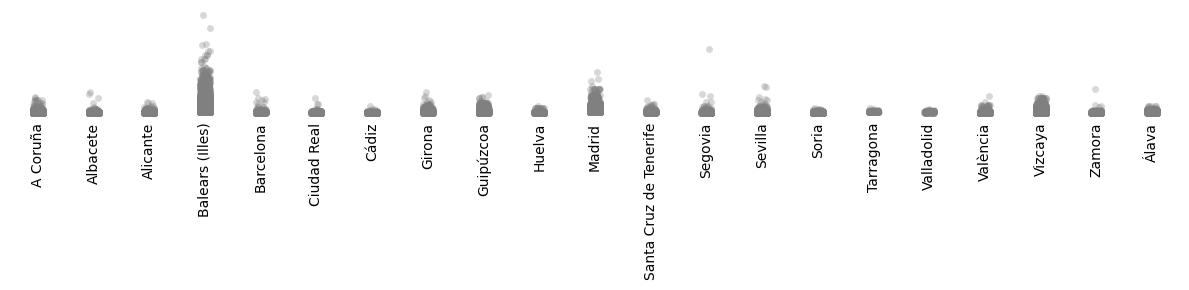

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
sns.stripplot(data=data, x='prov', y='price', jitter=0.09, color="grey", alpha=0.3, size=5)

# Quitar todos los spines (bordes)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Quitar ticks y etiquetas del eje Y
plt.yticks([])
plt.ylabel('')

# Quitar ticks del eje X, pero dejar las etiquetas de provincia
plt.tick_params(axis='x', which='both', length=0)

# Quitar título y eje X
plt.title('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/precios_por_provincia.png", dpi=300, transparent=True)

plt.show()

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/2421566024.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


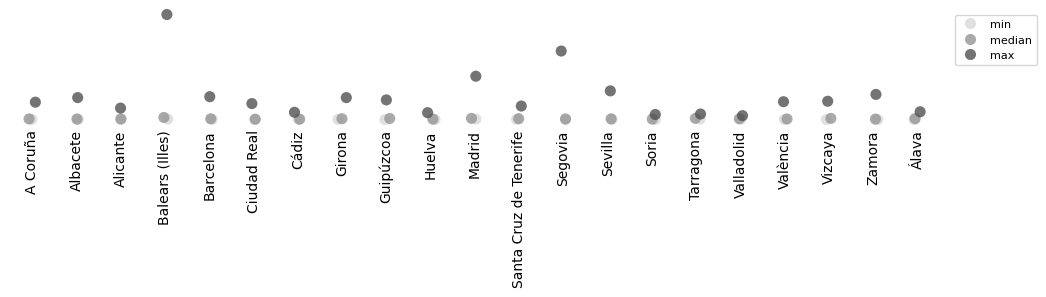

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'price' sea numérico
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data_clean = data.dropna(subset=['price'])

# Calcular min, max y median por provincia
summary = data_clean.groupby('prov')['price'].agg(['min', 'median', 'max']).reset_index()

# Convertir a formato largo para facilitar el stripplot
summary_long = summary.melt(id_vars='prov', var_name='stat', value_name='price')

# Plot
plt.figure(figsize=(12, 1.5))
sns.stripplot(data=summary_long, x='prov', y='price', hue='stat', jitter=True, alpha=0.8, size=8, palette='Greys')

# Estética
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.yticks([])
plt.ylabel('')
plt.tick_params(axis='x', which='both', length=0)
plt.title('')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(title='', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig("images/precios_min_med_max_por_provincia.png", dpi=300, transparent=True)
plt.show()


<Axes: xlabel='prov', ylabel='price'>

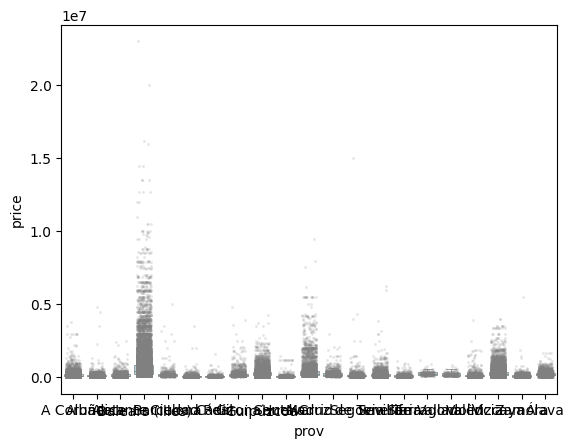

In [352]:
sns.boxplot(data=data, x='prov', y='price', fliersize=0, linewidth=0.5, color='lightblue')
sns.stripplot(data=data, x='prov', y='price', jitter=0.3, color='grey', alpha=0.2, size=2)


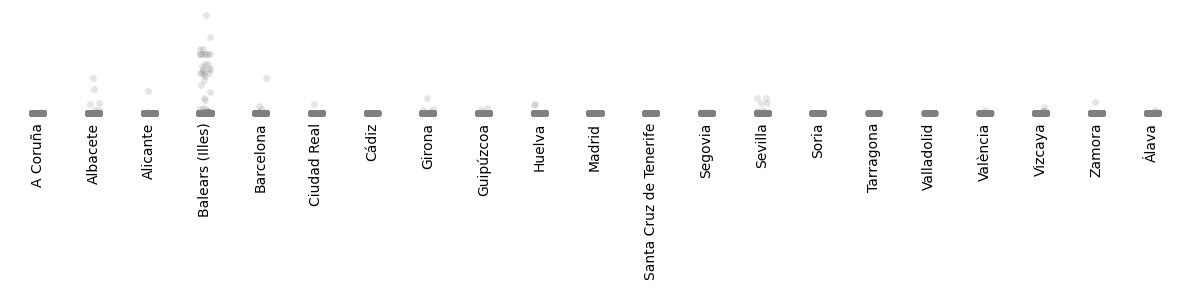

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
sns.stripplot(data=data, x='prov', y='price_per_m2', jitter=True, color="grey", alpha=0.2)

# Quitar todos los spines (bordes)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Quitar ticks y etiquetas del eje Y
plt.yticks([])
plt.ylabel('')

# Quitar ticks del eje X, pero dejar las etiquetas de provincia
plt.tick_params(axis='x', which='both', length=0)

# Quitar título y eje X
plt.title('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/precios_por_provincia.png", dpi=300, transparent=True)

plt.show()

In [354]:
pip install plotnine

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Index(['Ciudad Real', 'Huelva', 'Cádiz', 'Zamora', 'Soria', 'Albacete',
       'València', 'Alicante', 'Segovia', 'A Coruña', 'Sevilla', 'Barcelona',
       'Valladolid', 'Girona', 'Santa Cruz de Tenerife', 'Álava', 'Madrid',
       'Guipúzcoa', 'Tarragona', 'Vizcaya', 'Balears (Illes)'],
      dtype='object', name='prov')


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/666799444.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/jorgegarcelan/Library/Python/3.9/lib/python/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/jorgegarcelan/Library/Python/3.9/lib/python/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: grafico_python.png


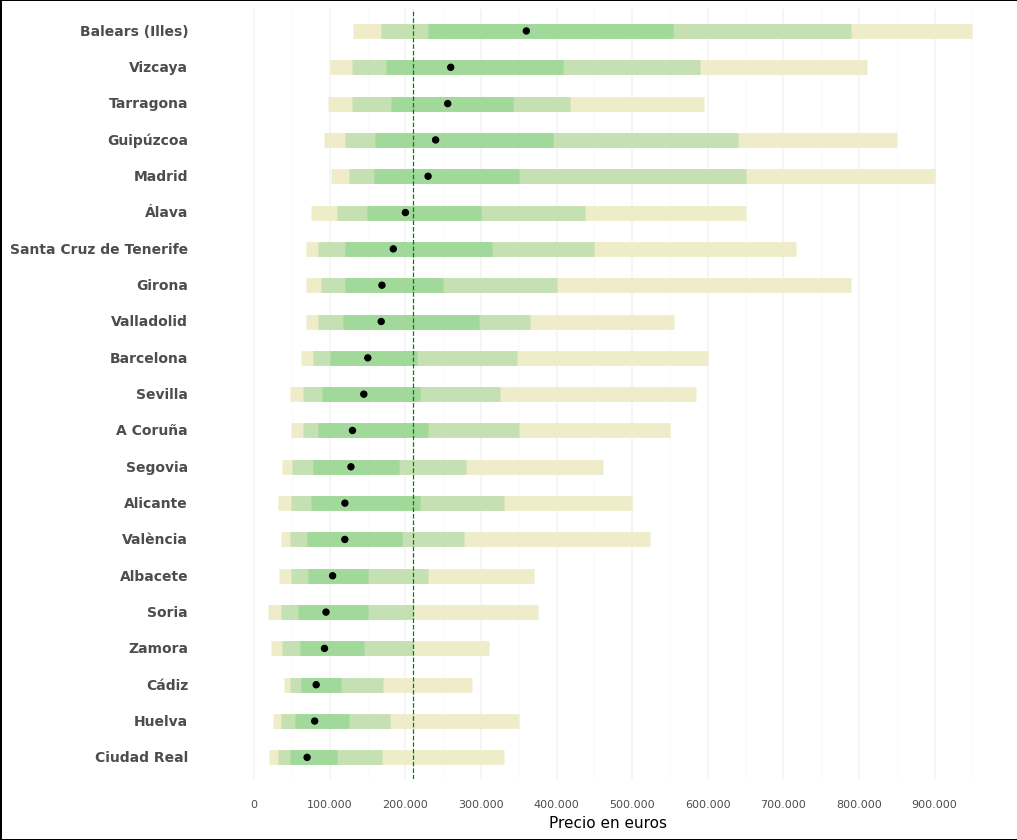

<ggplot: (896993136)>

In [355]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy.stats import gaussian_kde

# --- Preparar datos como en tu ejemplo ---
data_compra['price'] = pd.to_numeric(data_compra['price'], errors='coerce')

# Top 21 provincias
top_provincias = data_compra['prov'].value_counts().head(21).index

# Filtrado
df_plot = data_compra[
    data_compra['prov'].isin(top_provincias) & (data_compra['price'] <= 1_000_000)
].copy()

# Reordenar provincias por mediana (de mayor a menor)
prov_order = df_plot.groupby('prov')['price'].median().sort_values(ascending=True).index
print(prov_order)
df_plot['prov'] = pd.Categorical(df_plot['prov'], categories=prov_order, ordered=True)

# Calcular estadísticos por provincia
intervals = []
for prov, group in df_plot.groupby('prov'):
    prices = group['price'].dropna()
    if len(prices) < 10:
        continue

    q25, q50, q75 = np.percentile(prices, [25, 50, 75])
    q10, q90 = np.percentile(prices, [10, 90])
    q2_5, q97_5 = np.percentile(prices, [2.5, 97.5])
    
    intervals.append({
        'prov': prov,
        'median': q50,
        'p50_low': q25, 'p50_high': q75,
        'p80_low': q10, 'p80_high': q90,
        'p95_low': q2_5, 'p95_high': q97_5
    })

interval_df = pd.DataFrame(intervals)
interval_df['prov'] = pd.Categorical(interval_df['prov'], categories=prov_order, ordered=True)


# Línea vertical de mediana global
median_global = df_plot['price'].median()

# --- Gráfico ---
p = (
    ggplot(interval_df, aes(x='prov', y='median'))
    + geom_segment(aes(y='p95_low', yend='p95_high', x='prov', xend='prov'),
                   color='#efecca', size=6)
    + geom_segment(aes(y='p80_low', yend='p80_high', x='prov', xend='prov'),
                   color='#c5e0b3', size=6)
    + geom_segment(aes(y='p50_low', yend='p50_high', x='prov', xend='prov'),
                   color='#a1d99b', size=6)
    + geom_point(color='black', size=2)
    + geom_hline(yintercept=median_global, linetype='dashed', color='g')
    + coord_flip()
    + scale_y_continuous(breaks=range(0, 1_100_000, 100_000), labels=lambda l: [f"{int(v):,}".replace(",", ".") for v in l])
    + labs(x='', y='Precio en euros')
    + theme_minimal()
    + theme(
        figure_size=(10, 10),
        axis_text_y=element_text(size=10, weight='bold', ha='right', margin={'r': 20}),
        axis_text_x=element_text(size=8),
        panel_grid_major_y=element_blank(),
        panel_grid_major_x=element_line(color='lightgrey', size=0.3),
        plot_background=element_rect(fill='white'),
        panel_background=element_rect(fill='white'),
        axis_ticks=element_blank()
    )
)

p.save("grafico_python.png", dpi=300)
p


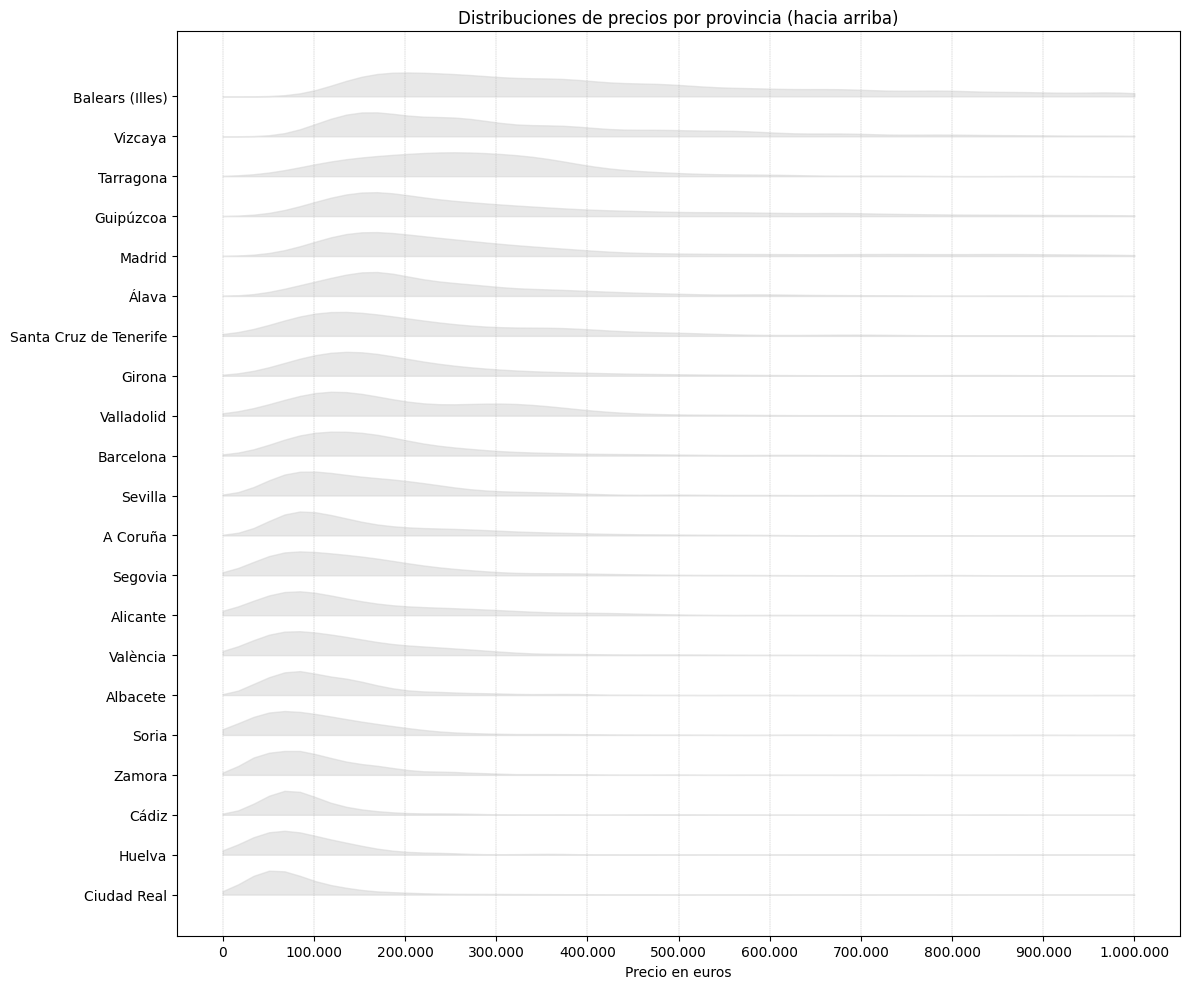

In [356]:
prov_to_num = {prov: i for i, prov in enumerate(prov_order)}

# Calcular curvas de densidad
density_data = []
for prov in prov_order:
    prices = df_plot[df_plot['prov'] == prov]['price'].dropna()
    if len(prices) < 10:
        continue
    kde = gaussian_kde(prices)
    x_vals = np.linspace(0, 1_000_000, 60)
    y_vals = kde(x_vals)
    y_vals = y_vals / y_vals.max() * 0.6  # escalar altura
    y_offset = prov_to_num[prov]
    density_data.append((x_vals, y_vals + y_offset, prov))

plt.figure(figsize=(12, 10))
for x, y, prov in density_data:
    base = prov_to_num[prov]
    plt.fill_between(x, base, y, alpha=0.5, color='lightgrey')  # invertir los extremos

# Estética del gráfico
plt.yticks(list(prov_to_num.values()), list(prov_order))
plt.xticks(np.arange(0, 1_100_000, 100_000),
           [f"{int(v):,}".replace(",", ".") for v in np.arange(0, 1_100_000, 100_000)])
plt.xlabel("Precio en euros")
plt.grid(axis='x', linestyle='--', linewidth=0.3)
plt.title("Distribuciones de precios por provincia (hacia arriba)")
plt.tight_layout()
plt.show()

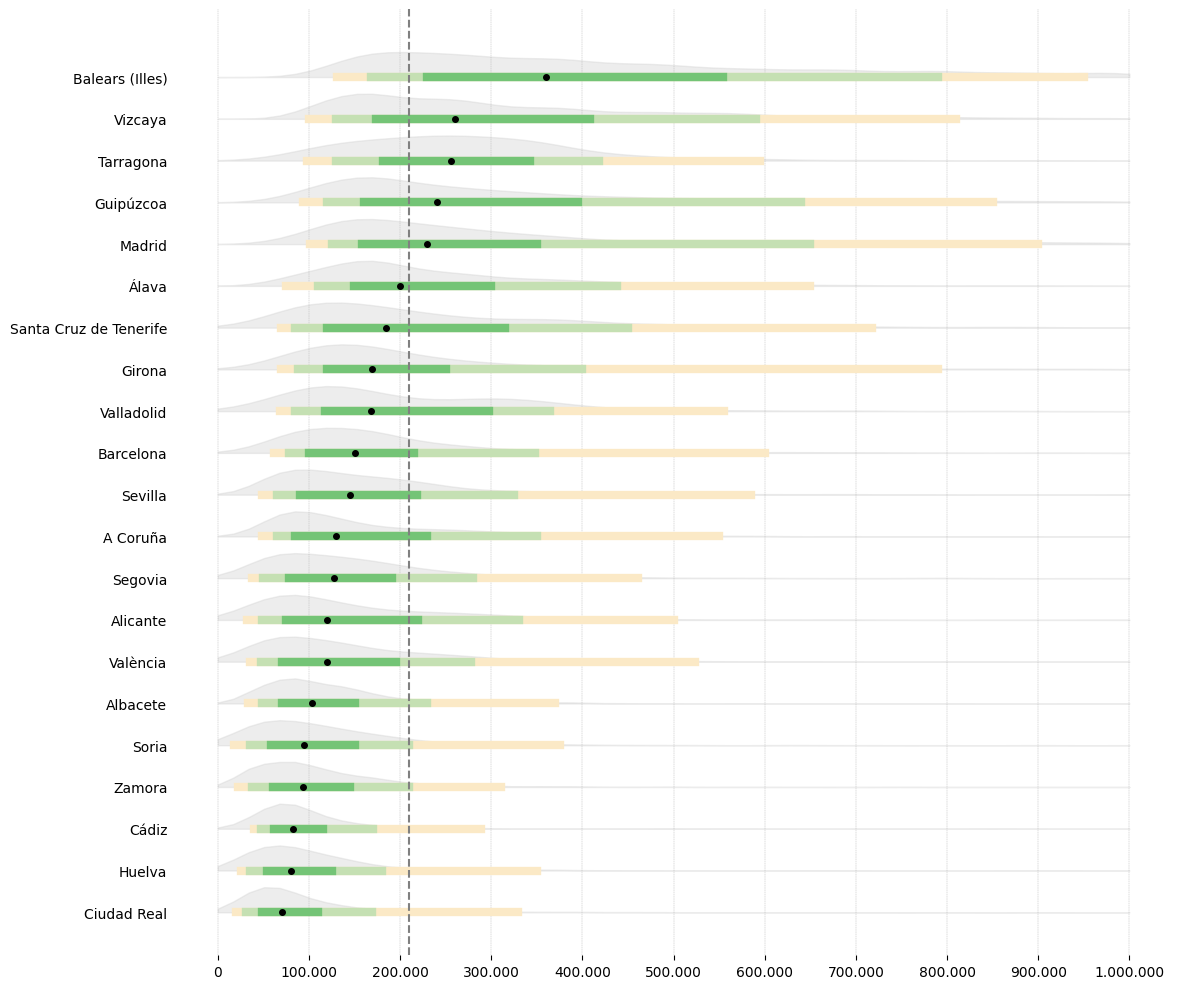

In [357]:
# Recomponer interval_df si no está definido en el entorno actual

# Calcular estadísticos por provincia
intervals = []
for prov in prov_order:
    group = df_plot[df_plot['prov'] == prov]
    prices = group['price'].dropna()
    if len(prices) < 10:
        continue

    q25, q50, q75 = np.percentile(prices, [25, 50, 75])
    q10, q90 = np.percentile(prices, [10, 90])
    q2_5, q97_5 = np.percentile(prices, [2.5, 97.5])

    intervals.append({
        'prov': prov,
        'median': q50,
        'p50_low': q25, 'p50_high': q75,
        'p80_low': q10, 'p80_high': q90,
        'p95_low': q2_5, 'p95_high': q97_5
    })

interval_df = pd.DataFrame(intervals)
interval_df['prov'] = pd.Categorical(interval_df['prov'], categories=prov_order, ordered=True)

# Línea de mediana global
median_global = df_plot['price'].median()

  # estilo minimalista similar a theme_minimal

plt.figure(figsize=(12, 10))

# Dibujar distribuciones de densidad
for x, y, prov in density_data:
    base = prov_to_num[prov]
    plt.fill_between(x, base, y, alpha=0.4, color='lightgrey')

# Añadir barras de intervalos y medianas
for _, row in interval_df.iterrows():
    y = prov_to_num[row['prov']]
    plt.plot([row['p95_low'], row['p95_high']], [y, y], color='#fbe9c6', linewidth=6)
    plt.plot([row['p80_low'], row['p80_high']], [y, y], color='#c5e0b3', linewidth=6)
    plt.plot([row['p50_low'], row['p50_high']], [y, y], color='#74c476', linewidth=6)
    plt.plot(row['median'], y, 'o', color='black', markersize=4)

# Línea vertical de mediana global
plt.axvline(median_global, linestyle='--', color='grey')

# Ejes
plt.yticks(list(prov_to_num.values()), list(prov_order))
plt.xticks(np.arange(0, 1_100_000, 100_000),
           [f"{int(v):,}".replace(",", ".") for v in np.arange(0, 1_100_000, 100_000)])
plt.grid(axis='x', linestyle='--', linewidth=0.3)

# Quitar recuadro y ticks del eje Y
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='y', length=0)

# Más espacio a la izquierda
plt.subplots_adjust(left=0.35)

plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/distribuciones_por_provincia.png", dpi=300, transparent=True)
plt.show()

In [358]:
interval_df

,prov,median,p50_low,p50_high,p80_low,p80_high,p95_low,p95_high
0,Ciudad Real,70000.0,48000.0,110000.0,31297.0,169400.0,20000.000,329850.0
1,Huelva,80000.0,54000.0,125000.0,35000.0,180000.0,25000.000,350000.0
2,Cádiz,82000.0,62000.0,115000.0,47150.0,170000.0,39500.000,288300.0
3,Zamora,93000.0,60000.0,145000.0,37000.0,209636.8,22000.000,311100.0
4,Soria,95000.0,58000.0,150000.0,35000.0,210000.0,18000.000,374875.0
5,Albacete,103750.0,70536.0,150000.0,48179.3,230000.0,33000.000,370000.0
6,València,119900.0,70000.0,195000.0,47700.0,278000.0,35660.000,523500.0
7,Alicante,120000.0,75000.0,220000.0,48384.0,330000.0,31830.000,500000.0
8,Segovia,128000.0,78000.0,191019.0,50000.0,280000.0,37100.000,461500.0
9,A Coruña,130000.0,85000.0,230000.0,65000.0,350000.0,48396.000,550000.0


## Predicción

In [359]:
# Variables proporcionadas
selected_features = [
    'air_conditioner', 'balcony', 'bath_num', 'built_in_wardrobe', 'chimney', 'condition',
    'floor', 'garage', 'garden', 'm2_real', 'reduced_mobility', 'lift',
    'room_num', 'storage_room', 'swimming_pool', 'terrace', 'house_category', 'prov'
]

target = 'price'

# Filtrar solo las columnas necesarias
data_compra = data_compra[selected_features + [target]].copy()
data_compra.head()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,floor,garage,garden,m2_real,reduced_mobility,lift,room_num,storage_room,swimming_pool,terrace,house_category,prov,price
61789,0,0,2,0,0,segunda mano/para reformar,2 plantas,NaN,1,800,0,NaN,5,0,0,0,Casa / Chalet,A Coruña,79500
61790,0,0,1,0,0,segunda mano/buen estado,bajo exterior,plaza de garaje incluida en el precio,0,70,0,1,2,1,0,0,Piso / Ático,A Coruña,80000
61792,0,0,2,0,0,segunda mano/buen estado,2 plantas,plaza de garaje incluida en el precio,0,200,0,NaN,3,0,0,1,Casa / Chalet,A Coruña,235000
61793,0,0,1,0,0,segunda mano/buen estado,NaN,NaN,0,80,0,NaN,2,0,0,0,Casa / Chalet,A Coruña,75000
61794,0,0,1,1,0,segunda mano/buen estado,planta 2ª exterior,plaza de garaje incluida en el precio,1,65,0,1,2,0,1,0,Piso / Ático,A Coruña,65000


In [360]:
# Crear columnas dummy para 'condition', excluyendo la primera para evitar multicolinealidad
dummies_condition = pd.get_dummies(data_compra['condition'], prefix='condition', drop_first=True)

# Unirlas al DataFrame original
data_compra = pd.concat([data_compra.drop(columns='condition'), dummies_condition], axis=1)

In [361]:
import re

def normalizar_floor(valor):
    if pd.isna(valor):
        return 0

    val = valor.lower()

    if any(x in val for x in ['-2']):
        return -1
    if any(x in val for x in ['-1', 'sótano', 'semi-sótano']):
        return -1
    if any(x in val for x in ['bajo', 'entreplanta', 'planta 0']):
        return 0
    if any(x in val for x in ['1ª', '1 planta']):
        return 1
    if any(x in val for x in ['2ª', '2 plantas']):
        return 2
    if any(x in val for x in ['3ª', '3 plantas']):
        return 3
    if any(x in val for x in ['4ª', '4 plantas']):
        return 4
    if any(x in val for x in ['5ª', '5 plantas']):
        return 5
    if match := re.search(r'planta (\d+)', val):
        num = int(match.group(1))
        return 5 if num >= 5 else num

    return 0  # por si queda alguno raro

# Aplicar al DataFrame
data_compra['floor'] = data_compra['floor'].apply(normalizar_floor).astype('Int64')

In [362]:
data_compra['garage'] = data_compra['garage'].fillna('').str.lower().apply(
    lambda x: 1 if 'incluida' in x or '0 eur' in x or '1 eur' in x else 0
).astype(int)

In [363]:
data_compra['lift'] = data_compra['lift'].fillna('').str.lower().apply(
    lambda x: 1 if '1' in x or '1.0' in x else 0
).astype(int)

In [364]:
categories_dummies = pd.get_dummies(data_compra['house_category'], prefix='house_category', drop_first=True)
data_compra = pd.concat([data_compra.drop(columns='house_category'), categories_dummies], axis=1)

In [365]:
prov_dummies = pd.get_dummies(data_compra['prov'], prefix='prov', drop_first=True)
data_compra = pd.concat([data_compra.drop(columns='prov'), prov_dummies], axis=1)

In [366]:
data_compra['bath_num'] = data_compra['bath_num'].replace('sin baños', 0).astype(int)

In [367]:
data_compra['room_num'] = data_compra['room_num'].replace('sin habitación', 0).astype(int)

In [368]:
data_compra.isna().sum()

air_conditioner                         0
balcony                                 0
bath_num                                0
built_in_wardrobe                       0
chimney                                 0
floor                                   0
garage                                  0
garden                                  0
m2_real                                 0
reduced_mobility                        0
lift                                    0
room_num                                0
storage_room                            0
swimming_pool                           0
terrace                                 0
price                                   0
condition_segunda mano/buen estado      0
condition_segunda mano/para reformar    0
house_category_Casa rural / rústica     0
house_category_Piso / Ático             0
house_category_Vivienda singular        0
prov_Albacete                           0
prov_Alicante                           0
prov_Balears (Illes)              

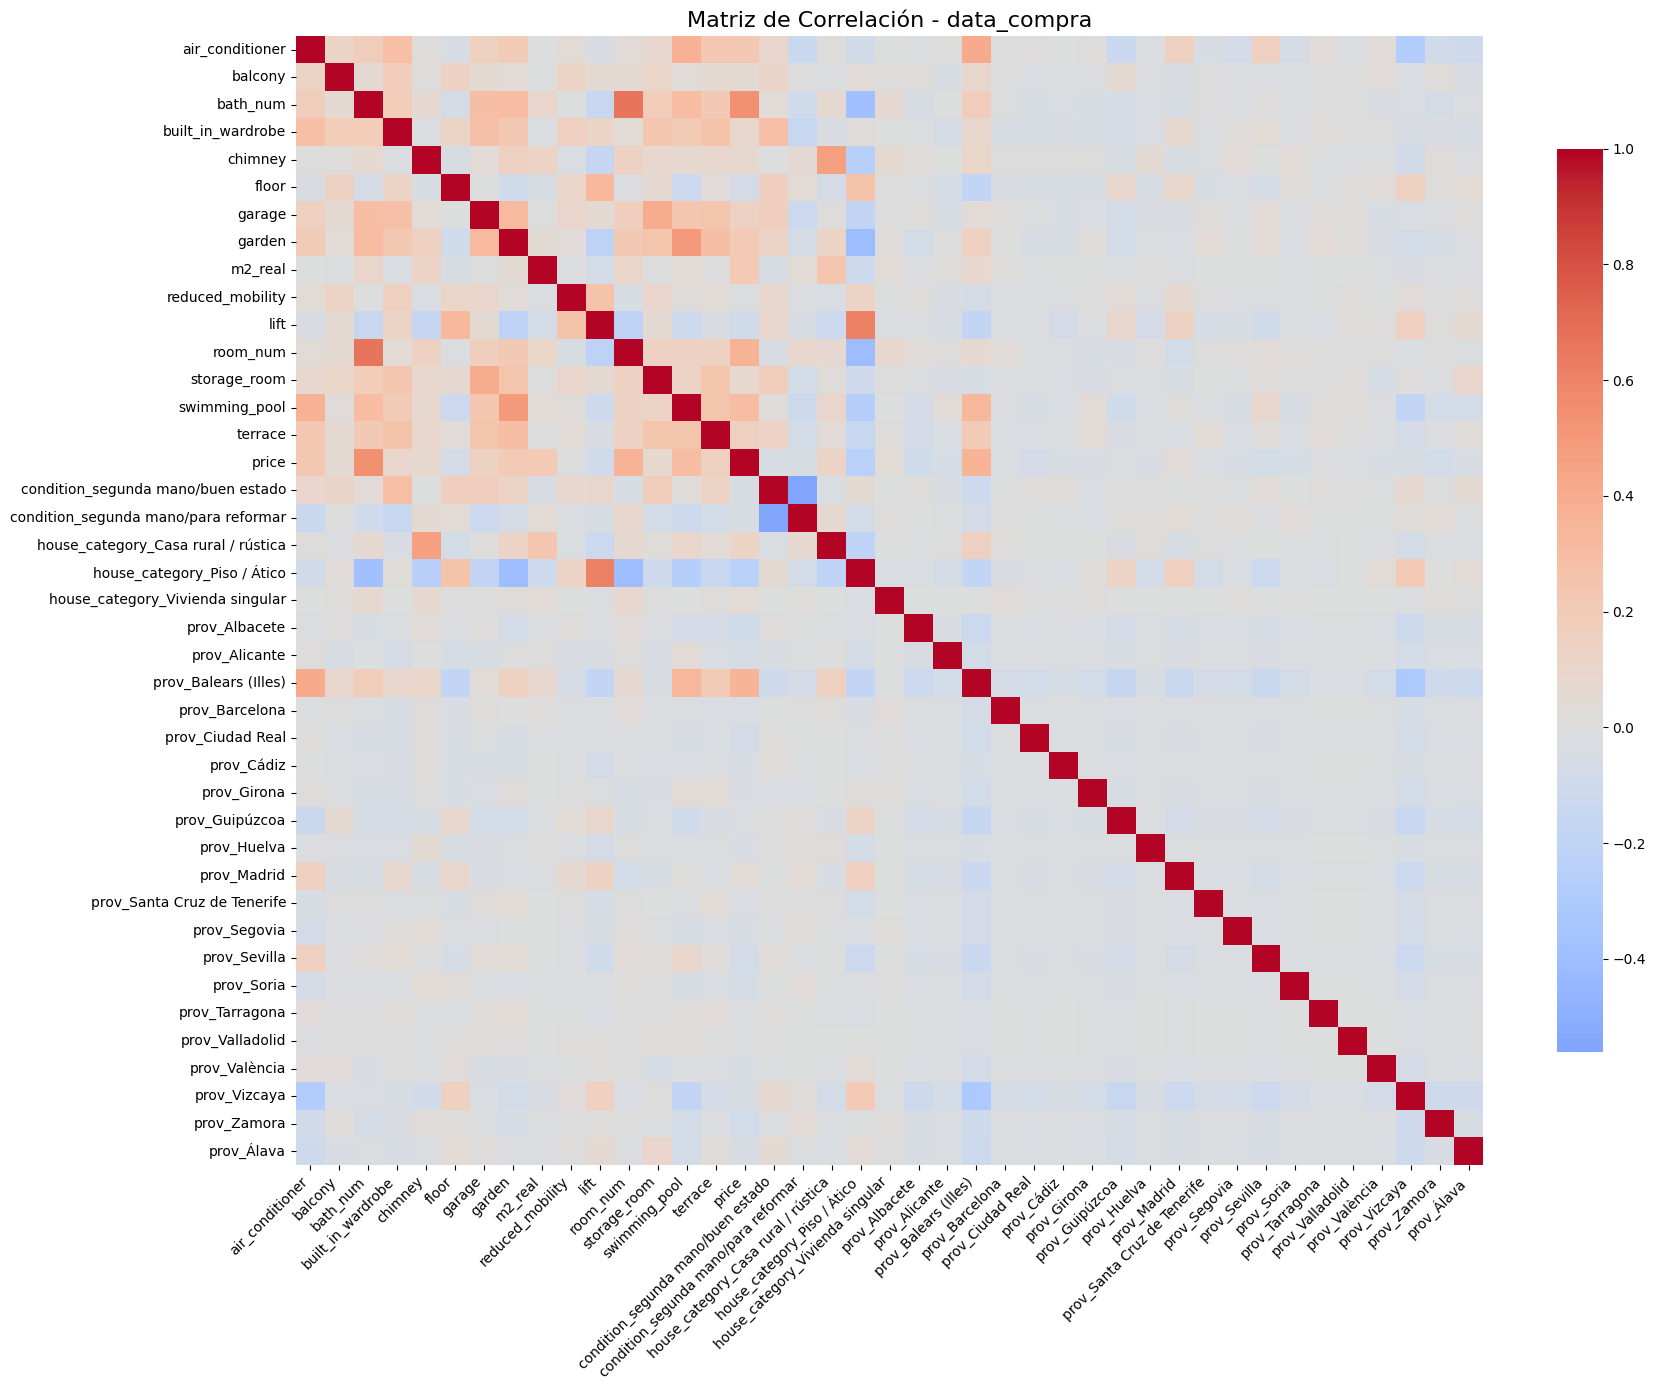

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = data_compra.corr()

# Gráfico con una palette bonita
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - data_compra', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [376]:
# Convertir todos los booleanos a enteros explícitamente
data_compra = data_compra.astype({col: int for col in data_compra.select_dtypes(include='bool').columns})

In [377]:
data_compra.to_csv("data/spanish_houses_compra.csv", index=False)

In [388]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        if pd.api.types.is_numeric_dtype(df_clean[col]):
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [389]:
cols_to_check = ['price']
data_compra = remove_outliers_iqr(data_compra, cols_to_check)

In [406]:
from sklearn.model_selection import train_test_split

# Separar features y target
X = data_compra.drop(columns=[target])
y = data_compra[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Método paramétrico

In [407]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')  # ajusta k si quieres
selector.fit(X_train, y_train)

# Puedes inspeccionar qué variables aportan menos
feature_scores = pd.DataFrame({
    'feature': X_train.columns,
    'score': selector.scores_
}).sort_values(by='score', ascending=False)


In [408]:
feature_scores

,feature,score
2,bath_num,24585.899486
22,prov_Balears (Illes),9612.256479
11,room_num,6884.620204
13,swimming_pool,6131.909499
7,garden,6130.672685
14,terrace,4711.389926
6,garage,4193.041789
18,house_category_Piso / Ático,3054.088967
0,air_conditioner,2666.365443
3,built_in_wardrobe,2652.794317


In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Función para entrenar y evaluar modelos
def train_and_evaluate(X_train, X_test, y_train, y_test, features):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

# Base: columnas útiles
prov_cols = [col for col in X_train.columns if col.startswith('prov_')]
house_category_cols = [col for col in X_train.columns if col.startswith('house_category_')]
estructurales = ['bath_num', 'room_num', 'garage', 'terrace', 'swimming_pool', 'garden', 'storage_room', 'm2_real', 'air_conditioner', 'built_in_wardrobe']

# Scores ordenados manualmente (simulados del mensaje anterior)
ordered_scores = [
    'bath_num', 'prov_Balears (Illes)', 'room_num', 'swimming_pool', 'garden',
    'terrace', 'garage', 'house_category_Piso / Ático', 'air_conditioner', 'built_in_wardrobe',
    'prov_Albacete', 'prov_Vizcaya', 'prov_Zamora', 'prov_Ciudad Real', 'storage_room',
    'prov_Sevilla', 'prov_Soria', 'prov_Cádiz', 'prov_Alicante', 'prov_València',
    'prov_Segovia', 'm2_real', 'prov_Huelva', 'condition_segunda mano/para reformar',
    'house_category_Casa rural / rústica', 'prov_Guipúzcoa', 'balcony', 'prov_Barcelona',
    'reduced_mobility', 'prov_Girona', 'condition_segunda mano/buen estado',
    'prov_Álava', 'prov_Madrid', 'prov_Santa Cruz de Tenerife', 'chimney',
    'prov_Valladolid', 'floor', 'lift', 'prov_Tarragona', 'house_category_Vivienda singular'
]

# Escenarios definidos
scenarios = {
    "Escenario 1: Top 10 scores": ordered_scores[:10],
    "Escenario 2: Top 5 + provincias": ordered_scores[:5] + prov_cols,
    "Escenario 3: Top 5 + categorías vivienda": ordered_scores[:5] + house_category_cols,
    "Escenario 4: Características estructurales": estructurales,
    "Escenario 5: Scores > 300": ordered_scores[:27],  # hasta 'prov_Guipúzcoa'

    "Escenario 6: Top 20 scores": ordered_scores[:20],
    "Escenario 7: Scores >= 100": [f for f in ordered_scores if f not in ['condition_segunda mano/buen estado', 'prov_Álava', 'prov_Madrid', 'prov_Santa Cruz de Tenerife', 'chimney', 'prov_Valladolid', 'floor', 'lift', 'prov_Tarragona', 'house_category_Vivienda singular']],
    "Escenario 8: Provincias + categorías + estructurales": prov_cols + house_category_cols + estructurales,
    "Escenario 9: Todo menos 5 peores": [f for f in X_train.columns if f not in ['lift', 'prov_Tarragona', 'prov_Álava', 'prov_Madrid', 'house_category_Vivienda singular']],
    "Escenario 10: Full model": list(X_train.columns)
}

# Evaluar cada escenario
scenario_results = []
for name, features in scenarios.items():
    valid_features = [f for f in features if f in X_train.columns]
    r2, rmse = train_and_evaluate(X_train, X_test, y_train, y_test, valid_features)
    scenario_results.append({
        'Escenario': name,
        'R²': round(r2, 4),
        'RMSE': round(rmse, 2),
        'Nº Variables': len(valid_features)
    })

# Mostrar resultados
results_df = pd.DataFrame(scenario_results)

In [419]:
results_df

,Escenario,R²,RMSE,Nº Variables
0,Escenario 1: Top 10 scores,0.4023,137667.82,10
1,Escenario 2: Top 5 + provincias,0.5492,119556.91,25
2,Escenario 3: Top 5 + categorías vivienda,0.3948,138529.67,8
3,Escenario 4: Características estructurales,0.3267,146111.81,10
4,Escenario 5: Scores > 300,0.5471,119839.92,27
5,Escenario 6: Top 20 scores,0.5159,123888.03,20
6,Escenario 7: Scores >= 100,0.5475,119778.26,30
7,Escenario 8: Provincias + categorías + estruct...,0.5699,116786.42,33
8,Escenario 9: Todo menos 5 peores,0.5481,119699.23,35
9,Escenario 10: Full model,0.5713,116586.81,39


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/1904290629.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



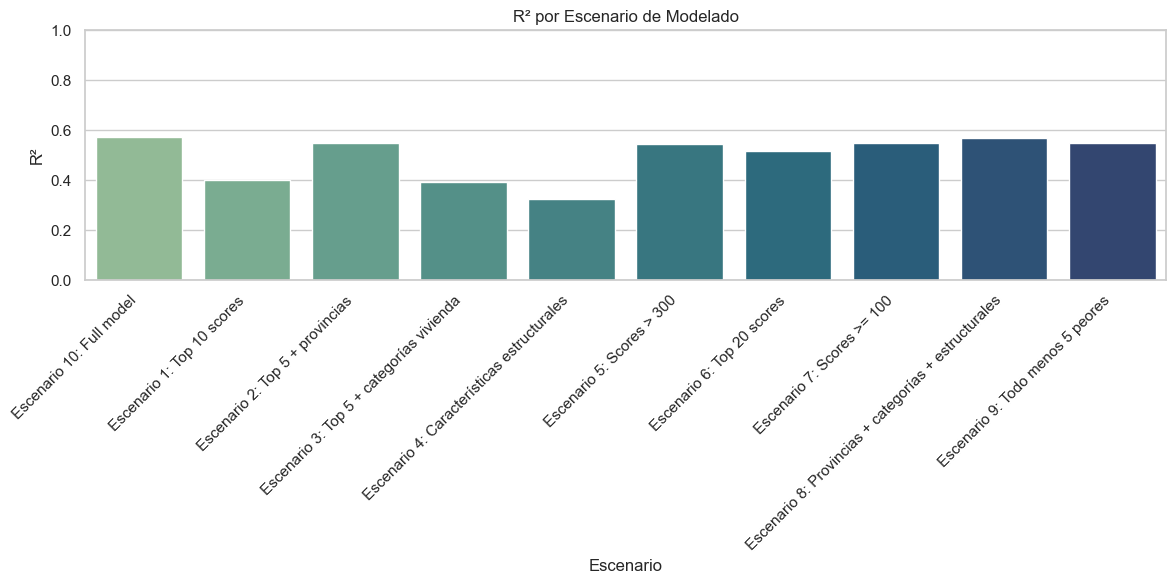

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/1904290629.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



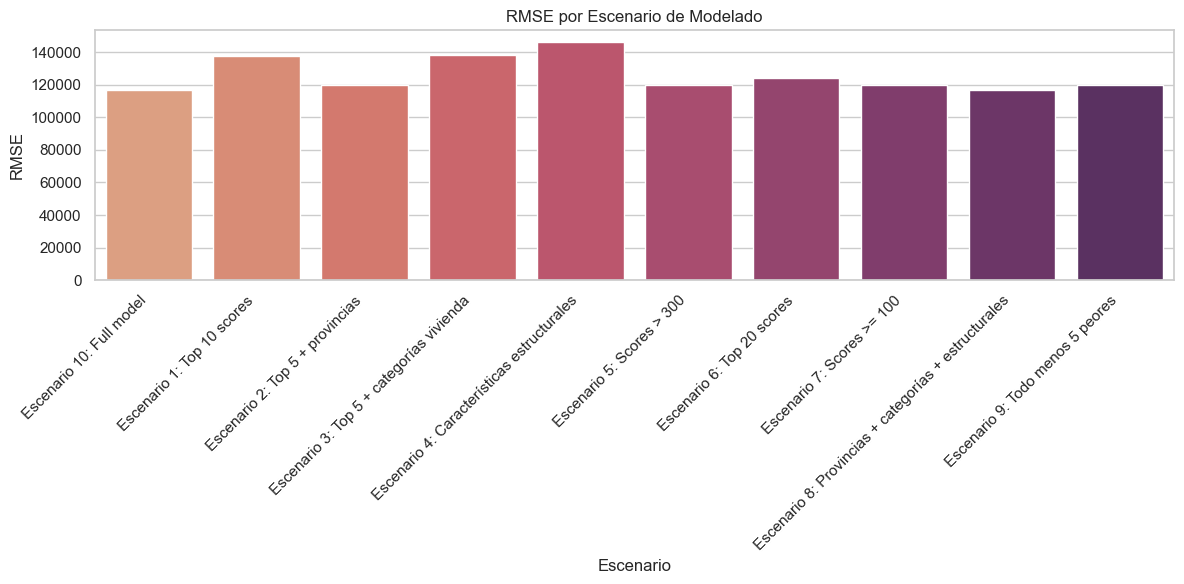

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_64443/1904290629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



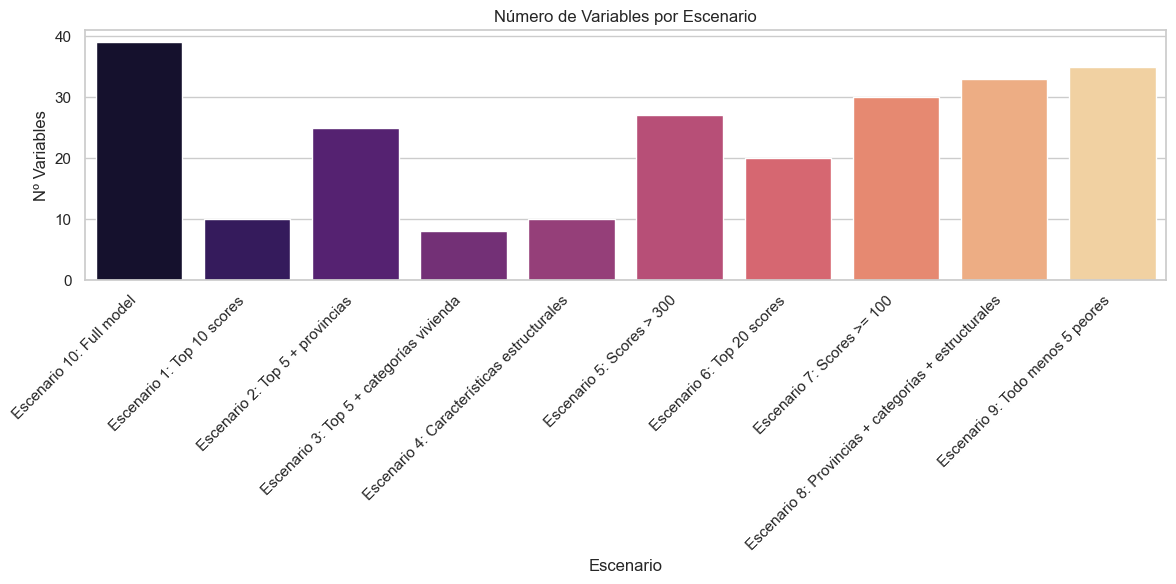

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que los resultados están ordenados por número de escenario para visualización clara
results_df_sorted = results_df.sort_values(by='Escenario')

# Estilo de gráfico
sns.set(style="whitegrid")

# Plot 1: R² por escenario
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_sorted, x='Escenario', y='R²', palette='crest')
plt.title('R² por Escenario de Modelado')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot 2: RMSE por escenario
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_sorted, x='Escenario', y='RMSE', palette='flare')
plt.title('RMSE por Escenario de Modelado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 3: Número de variables por escenario
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_sorted, x='Escenario', y='Nº Variables', palette='magma')
plt.title('Número de Variables por Escenario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Método no paramétrico

In [430]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Nueva función usando RandomForestRegressor
def train_and_evaluate_rf(X_train, X_test, y_train, y_test, features):
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

# Evaluar escenarios usando Random Forest
scenario_results_rf = []
for name, features in scenarios.items():
    valid_features = [f for f in features if f in X_train.columns]
    r2, rmse = train_and_evaluate_rf(X_train, X_test, y_train, y_test, valid_features)
    scenario_results_rf.append({
        'Escenario': name,
        'R²': round(r2, 4),
        'RMSE': round(rmse, 2),
        'Nº Variables': len(valid_features)
    })

# Mostrar resultados
results_df_rf = pd.DataFrame(scenario_results_rf)

In [431]:
results_df_rf

,Escenario,R²,RMSE,Nº Variables
0,Escenario 1: Top 10 scores,0.4597,130883.23,10
1,Escenario 2: Top 5 + provincias,0.6116,110981.07,25
2,Escenario 3: Top 5 + categorías vivienda,0.4543,131546.31,8
3,Escenario 4: Características estructurales,0.3757,140690.91,10
4,Escenario 5: Scores > 300,0.6649,103074.42,27
5,Escenario 6: Top 20 scores,0.5687,116936.48,20
6,Escenario 7: Scores >= 100,0.6705,102214.74,30
7,Escenario 8: Provincias + categorías + estruct...,0.6819,100422.96,33
8,Escenario 9: Todo menos 5 peores,0.6940,98495.38,35
9,Escenario 10: Full model,0.7149,95080.40,39
